**# Nivel 1**

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

- Importamos mysql.connector para realizar la conexión a MySQL
- Definimos los parámetros para realizar la conexión

In [1]:
import mysql.connector

connection = mysql.connector.connect(
    host='localhost',
    port = 3307,
    database='operativa',
    user='root',
    password="Emil2021?")

- Empleamos el método read_sql_query de Pandas para lanzar queries a nuestra base de datos y pedimos que nos muestre el nombre de las tablas que forman la base de datos conectada

In [2]:
import pandas as pd

# Visualizamos las tablas de la base de datos
tables = pd.read_sql_query("SHOW TABLES", connection)
tables

C:\Users\Alex\AppData\Local\Temp\ipykernel_9872\3470624116.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql_query("SHOW TABLES", connection)


,Tables_in_operativa
0,companies
1,credit_card_status
2,credit_cards
3,orders
4,products
5,transactions
6,users


A continuación, realizaremos una query solicitando toda las filas y columnas de cada tabla y la guardaremos en una variable que llevará el nombre de la tabla.

In [3]:
# Creamos un DataFrame con los datos de cada una de las tablas
companies = pd.read_sql_query("SELECT * FROM companies", connection)
credit_card_status = pd.read_sql_query("SELECT * FROM credit_card_status", connection)
credit_cards = pd.read_sql_query("SELECT * FROM credit_cards", connection)
orders = pd.read_sql_query("SELECT * FROM orders", connection)
products = pd.read_sql_query("SELECT * FROM products", connection)
transactions = pd.read_sql_query("SELECT * FROM transactions", connection)
users = pd.read_sql_query("SELECT * FROM users", connection)

# Cerramos la conexión a MySQL
connection.close()

C:\Users\Alex\AppData\Local\Temp\ipykernel_9872\4010662244.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  companies = pd.read_sql_query("SELECT * FROM companies", connection)


C:\Users\Alex\AppData\Local\Temp\ipykernel_9872\4010662244.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  credit_card_status = pd.read_sql_query("SELECT * FROM credit_card_status", connection)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9872\4010662244.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  credit_cards = pd.read_sql_query("SELECT * FROM credit_cards", connection)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9872\4010662244.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders = pd.read_sql_query("SELECT

Exportamos la info de cada tabla a un csv para luego volverlo a importar y convertirlo en un DataFrame.
De esta forma podremos trabajar con las tablas en Pandas sin depender de la conexión a MySQL.

In [4]:
# Exportamos cada uno de los DataFrames a un archivo csv
companies.to_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\companies.csv", index=False)
credit_card_status.to_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\credit_card_status.csv", index=False)
credit_cards.to_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\credit_cards.csv", index=False)
orders.to_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\orders.csv", index=False)
products.to_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\products.csv", index=False)
transactions.to_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\transactions.csv", index=False)
users.to_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\users.csv", index=False)



In [5]:
# Importamos los csv como DataFrames
companies = pd.read_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\companies.csv")
credit_card_status = pd.read_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\credit_card_status.csv")
credit_cards = pd.read_csv((r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\credit_cards.csv"))
orders = pd.read_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\orders.csv")
products = pd.read_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\products.csv")
transactions = pd.read_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\transactions.csv")
users = pd.read_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\users.csv")

Realizarás una visualización para cada ejercicio. Comenta lo que te llame la atención al graficar esa variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Ejercicio 1.1 : una variable numérica**

- Vamos a escoger como variable numérica la edad de los usuarios de la tabla users. Sin embargo, no tenemos ninguna columna de edad por lo que procederemos a crearla partiendo de la columna "birth_date" después de realizar algunas transformaciones en Pandas

Una vez que tengamos la edad de los usuarios, la graficaremos en un histograma para ver 

In [7]:
import pandas as pd
import numpy as np

# La columan "birth_date" contiene valores en str, por lo que la convertiremos a datetime
users["birth_date"] = pd.to_datetime(users["birth_date"])

# Creamos la variable today para usarla en la operación para obtener la edad
today = pd.to_datetime("today").normalize()

# Creamos la columna "age", y extraemos los días con dt.days. Dividimos entre 365 para obtener los años
users["age"] = (today - users["birth_date"]).dt.days / 365

# Convertimos a int y redondeamos a la baja con np.floor
users["age"] = np.floor(users["age"].astype(int))

users.head()


,id,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.,39
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,1992-08-23,United States,Des Moines,59464,903 Sit Ave,32
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,1998-04-29,United States,Columbus,56518,736-2063 Tellus St.,27
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,1989-02-18,United States,Kailua,77417,Ap #545-2244 Erat. Rd.,36
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,1998-09-26,United States,Sandy,31564,341-2821 Ultrices Av.,26


Para representar la variable numérica de la edad escogemos un histograma, permitiéndonos ver la distribución de usuarios según su edad, así como la cantidad de usuarios (eje Y) que tiene cada edad.

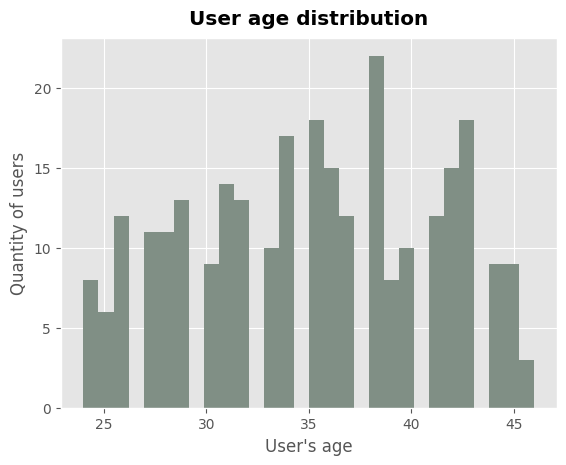

In [8]:
import matplotlib.pyplot as plt

# Graficamos
plt.style.use("ggplot")

fig, ax = plt.subplots()

ax.hist(users["age"],
        bins=30,
        color="#808F85")

ax.set_xlabel("User's age")
ax.set_ylabel("Quantity of users")
ax.set_title("User age distribution", weight="bold"
             , pad=10)
plt.show()

**Insights:**

- La distribución de los usuarios por edad es relativamente uniforme, aunque con algunas caídas en los extremos, sobretodo a partir de 45 años.
- El rango de edad va desde los 22 hasta los 46 años.
- La mayoría de usuarios se concentran entre los 35 y los 39 años.
- Hay menor cantidad de usuarios comprendidos en las franjas entre los 22 y 25 años y los 45-46 años.

## **Ejercicio 1.2: dos variables numéricas**

- Las dos variables numéricas que vamos a usar van a ser la edad de los usuarios y el gasto promedio por edad


In [9]:
# Damos un vistazo rápido a los datos que tenemos en ambas tablas
# users.head()
transactions.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5252
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0499
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5559
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2982


In [10]:
# Hacemos join entre los dataframes transactions y users para obtener todos los datos que necesitamos en una única tabla
users_transactions_merged = pd.merge(transactions, users, left_on = "user_id", right_on = "id")
users_transactions_merged

# Hacemos un group by para agrupar el valor de gasto promedio por edad. Redondeamos a dos decimales
age_avg_spending = (users_transactions_merged.groupby("age").agg(avg_spending=("amount", "mean"), user_count=("user_id", "nunique")).round(2).reset_index())

# Renombramos la columna "amount" para que su contenido sea más explícito
age_avg_spending.rename(columns={"amount": "avg_spending"}, inplace=True)

age_avg_spending.head()

,age,avg_spending,user_count
0,24,218.81,8
1,25,199.78,4
2,26,244.57,9
3,27,279.14,9
4,28,250.49,11


Para representar ambas variables numéricas escogemos un scatterplot, lo cual nos permitirá ver la correlación de ambas variables.

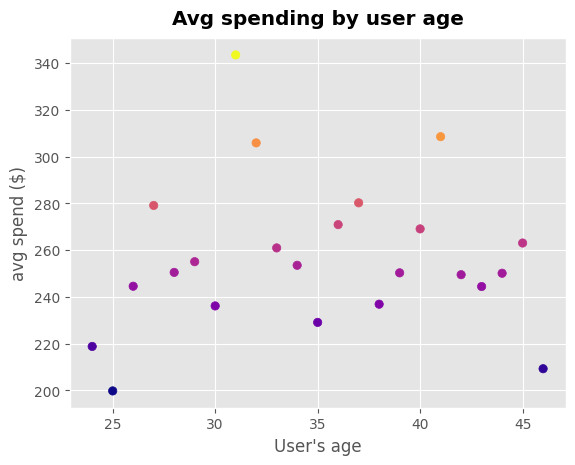

In [11]:
plt.style.use("ggplot")
fig, ax = plt.subplots()

ax.scatter(age_avg_spending["age"],
           age_avg_spending["avg_spending"],
           c=age_avg_spending["avg_spending"],
           cmap= "plasma"
)


ax.set_xlabel("User's age")
ax.set_ylabel("avg spend ($)")
ax.set_title("Avg spending by user age", weight="bold", pad=10)

plt.show()

**Insights:**

- El gasto promedio varia claramente según la edad, aunque no se observa una tendencia clara ya sea ascendente o descendente. Quizá esto podría indicar que existen otras variables además de la edad (ingresos, estudios, etc)
- El gasto promedio más elevado se encuentra a los 32 años, con un importe de 335$
- Los usuarios que por edad se encuentran en los extremos gastan de media considerablemente menos que el resto (<25 y >45)

## **Ejercicio 1.3: una variable categórica**

- Vamos a utilizar como variable categórica el país desde el cual operan las empresas que realizan compras.

In [12]:
# Vistazo general al DataFrame companies
companies.head()

,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings


In [13]:
# Creamos un df que incorpore los diferentes países y un recuento del número de empresas por país
companies_count = companies["country"].value_counts().reset_index()
companies_count

# Renombramos la columna "count" para que su contenido sea más explícito
companies_count.rename(columns={"count": "companies_count"}, inplace=True)

companies_count.head()

,country,companies_count
0,Sweden,11
1,Netherlands,10
2,United States,9
3,United Kingdom,9
4,Italy,9


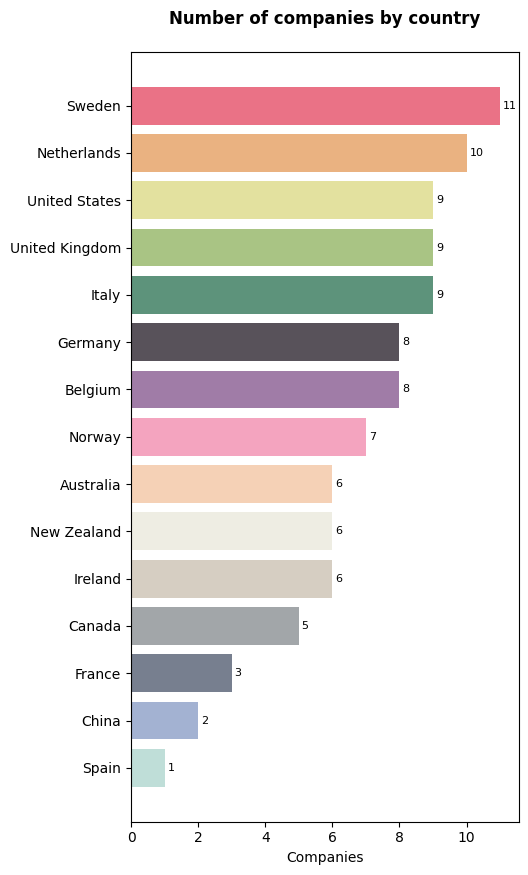

In [14]:
# Volvemos al estilo por defecto de matplotlib
plt.style.use("default")

fig, ax = plt.subplots(figsize=(5,10))

# Creamos una variable para asignar una paleta de colores personalizada a las barras
colors = ["#ea7286","#eab281","#e3e19f", "#a9c484", "#5d937b", "#58525a","#a07ca7","#f4a4bf",
          "#f5d1b6", "#eeede3", "#d6cec2","#a2a6a9", "#777f8f", "#a3b2d2", "#bfded8",#bf796d
]

ax.barh(companies_count["country"],
        companies_count["companies_count"],
        color = colors) # Al personalizar el color llamamos a la variable "colors"

# Añadimos etiquetas de datos a cada barra
for container in ax.containers:
    ax.bar_label(container,label_type='edge', padding=2, fontsize=8)

ax.set_xlabel("Companies")
ax.set_title("Number of companies by country", weight="bold", pad=20)
ax.invert_yaxis() # Invertimos los valores para obtenerlos en orden DESC. Por defecto, se mostraba en ASC

plt.show()


## **Ejercicio 1.4: una variable categórica y una numérica**

- Vamos a usar como variable categórica la columna país y como variable numérica el recuento del importe gastado por empresa.

In [15]:
# Vistazo general al df transactions
transactions.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5252
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0499
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5559
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2982


In [16]:
# Vistrazo general al df companies
companies.head()

,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings


In [17]:
# Hacemos un merge de ambos DataFrames
trans_comp_merged = pd.merge(transactions, companies, left_on="business_id", right_on="company_id")

# En un nuevo DataFrame, calculamos el promedio de la columna ["amount"] y agrupamos por países.
trans_comp_grouped = trans_comp_merged.groupby("country")["amount"].mean().reset_index().round(2)

# Renombramos la columna "amount" para que su nombre sea más indicativo
trans_comp_grouped.rename(columns={"amount": "avg_amount"}, inplace=True)

# Organizamos avg_amount de mayor a menor
trans_comp_sorted = trans_comp_grouped.sort_values("avg_amount", ascending=False).reset_index(drop=True) # Creamos un nuevo índice y eliminamos el previo

# El resultado es la tabla que usaremos para graficar
trans_comp_sorted


,country,avg_amount
0,United States,309.18
1,Ireland,277.31
2,United Kingdom,270.73
3,Canada,269.65
4,Sweden,260.62
5,Norway,254.22
6,Netherlands,253.02
7,Germany,244.20
8,Australia,232.05
9,Belgium,228.15


In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\Alex\AppData\Local\Temp\ipykernel_9872\600989062.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(trans_comp_sorted["country"], rotation = 90)


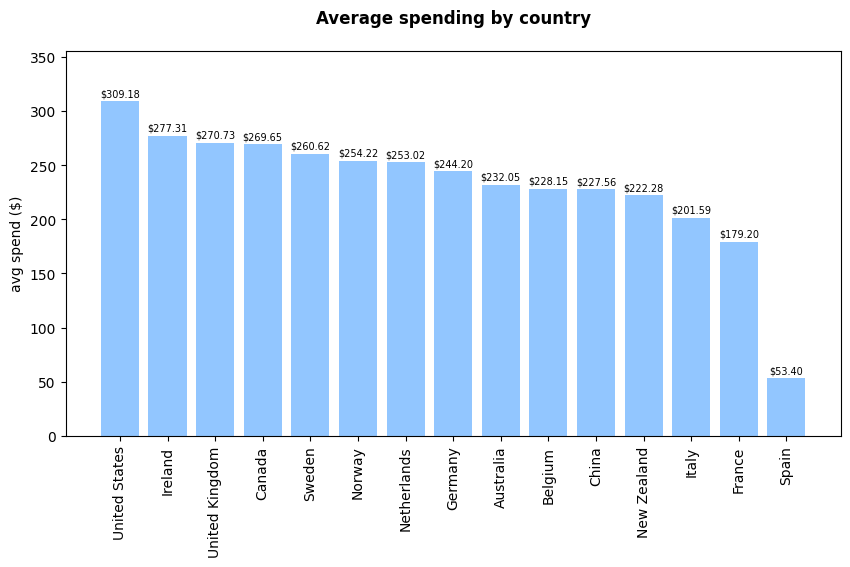

In [19]:
# plt.style.use("seaborn-v0_8-pastel")
plt.style.use("seaborn-v0_8-pastel")


fig, ax = plt.subplots(figsize=(10,5))

ax.bar(trans_comp_sorted["country"], trans_comp_sorted["avg_amount"])

ax.set_ylabel("avg spend ($)")
ax.set_xticklabels(trans_comp_sorted["country"], rotation = 90)
ax.set_title("Average spending by country", weight="bold", pad=20)

# Aumentamos la separación entre la columna más alta y el límite superior de la figura
max_val = trans_comp_sorted["avg_amount"].max()
ax.set_ylim(top=max_val * 1.15)

for container in ax.containers:
    ax.bar_label(container,label_type='edge', padding=2, fontsize=7, fmt='$%.2f')
    

plt.show()

## **Ejercicio 1.5: dos variables categóricas**

- Las dos variables categóricas con las que vamos a trabajar van a ser el país y las transacciones (declinadas o no declinadas)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transactions.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5252
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0499
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5559
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2982


In [21]:
users.head()

,id,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.,39
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,1992-08-23,United States,Des Moines,59464,903 Sit Ave,32
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,1998-04-29,United States,Columbus,56518,736-2063 Tellus St.,27
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,1989-02-18,United States,Kailua,77417,Ap #545-2244 Erat. Rd.,36
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,1998-09-26,United States,Sandy,31564,341-2821 Ultrices Av.,26


In [22]:
# Hacemos merge para unir las tablas transactions y users 
trans_users_merged = pd.merge(transactions, users, left_on="user_id", right_on="id").reset_index()
trans_users_merged

# Filtramos y nos quedamos con las columnas que queremos para graficar
country_trans_filtered = trans_users_merged[["country","declined"]]
country_trans_filtered

# Agrupamos por los campos "country" y "declined". Cambiamos el nombre de algunas columnas para mejor contextualización
country_trans_grouped = country_trans_filtered.groupby(["country","declined"]).size().reset_index().rename(columns={0: "total_transactions", "declined" : "status"})
country_trans_grouped



,country,status,total_transactions
0,Canada,0,265
1,Canada,1,87
2,United Kingdom,0,62
3,United States,0,173


In [23]:
# Creamos una función para mapear los resultados de la columna "status" y cambiar su nombre
def cambio_valor(valor):
    if valor == 0:
        return "Accepted"
    else:
        return "Declined"

# Llamamos a la función con .apply para aplicarla a la columna "status"
country_trans_grouped["status"] = country_trans_grouped["status"].apply(cambio_valor)
country_trans_grouped

,country,status,total_transactions
0,Canada,Accepted,265
1,Canada,Declined,87
2,United Kingdom,Accepted,62
3,United States,Accepted,173


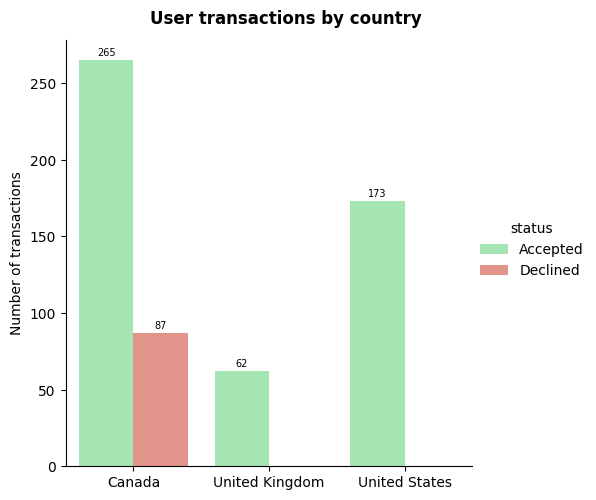

In [24]:
# Creamos una paleta de colores condicionales personalizados
colores = {"Accepted" : "#9AF0AE",
           "Declined" : "#EF8A7B"}

# Asignamos el Facetgrid a g
g = sns.catplot(data=country_trans_grouped,
                x="country",
                y="total_transactions",
                kind="bar",
                hue="status",
                palette=colores)

g.set(xlabel="", ylabel="Number of transactions")
g.fig.suptitle("User transactions by country", weight= "bold", y=1.03)

# Añadimos etiquetas de valores a las barras
for container in g.ax.containers:
    g.ax.bar_label(container,label_type='edge', padding=2, fontsize=7)


plt.show()

## **Ejercicio 1.6: tres variables**

- Vamos a emplear una variable numérica (amount) y dos categóricas (grupos de edad de los usuarios y país de origen)
- Usaremos el DataFrame trans_user_merged que hemos creado con anterioridad


In [25]:
trans_users_merged.head()

,index,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,...,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,...,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40
1,1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,...,William,Benjamin,0800 1111,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,38
2,2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,...,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42
3,3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,...,Chloe,Keith,022-178-1548,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",26
4,4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,...,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40


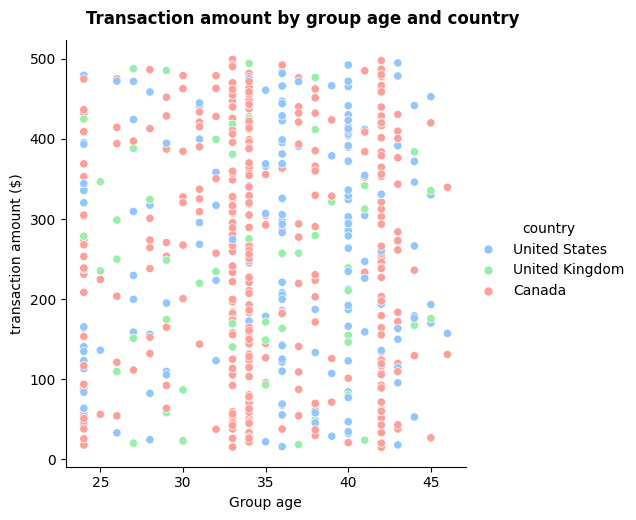

In [26]:
g = sns.relplot(data=trans_users_merged,
                x="age",
                y="amount",
                hue="country",
                kind="scatter")

g.figure.suptitle("Transaction amount by group age and country", weight="bold", y=1.03)
g.set(xlabel="Group age", ylabel="transaction amount ($)")

Insights:
- Tenemos más usuarios en la franja de 33 a 43 años que en cualquier otra franja de edad
- Por el contrario, vemos menos usuarios comprendidos entre los 25 y los 32 años.
- Los usuarios que más compran son los canadienses entre los 33-35 años y los de 42, representando un comportamiento variado en compras ya que sus transacciones van desde bajos importes (10 $) hasta los 500 $
- Los usuarios americanos que más compran se encuentran entre los 36 y 40 años.
- Tenemos una base menor de usuarios en Reino Unido en comparación con Canadá y Estados Unidos.

## **Ejercicio 1.7: graficar un pairplot**

- Vamos a emplear las variables numéricas product_qty, amount y age
- Añadiremos country como variable categórica para poder comparar los datos por país


In [27]:
# Damos un vistazo rápido a la tabla orders
orders.head()

,transaction_id,product_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
1,122DC333-E19F-D629-DCD8-9C54CF1EBB9A,1
2,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1
3,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1
4,1EA2B262-D507-AD14-4374-4D532967113F,1


In [28]:
# Agrupamos la columna por "transaction_id" y realizo un conteo para saber cuantos productos están asignado a cada transacción.
prod_per_transaction = orders.groupby("transaction_id").count().reset_index()
prod_per_transaction.head()

# Renombramos la columna product_id
prod_per_transaction.rename(columns={"product_id" : "product_qty"}, inplace=True)

prod_per_transaction.head()

,transaction_id,product_qty
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3
1,0466A42E-47CF-8D24-FD01-C0B689713128,3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2


In [29]:
# Hacemos un merge de prod_per_transaction con trans_user_merged mediante el identificador de transacción

transactions_completed = pd.merge(prod_per_transaction, trans_users_merged, left_on="transaction_id", right_on="id_x")

transactions_completed.head()


,transaction_id,product_qty,index,id_x,card_id,business_id,timestamp,amount,declined,product_ids,...,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3,0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",...,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40
1,0466A42E-47CF-8D24-FD01-C0B689713128,3,1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",...,William,Benjamin,0800 1111,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,38
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4,2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",...,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3,3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",...,Chloe,Keith,022-178-1548,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",26
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2,4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",...,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40


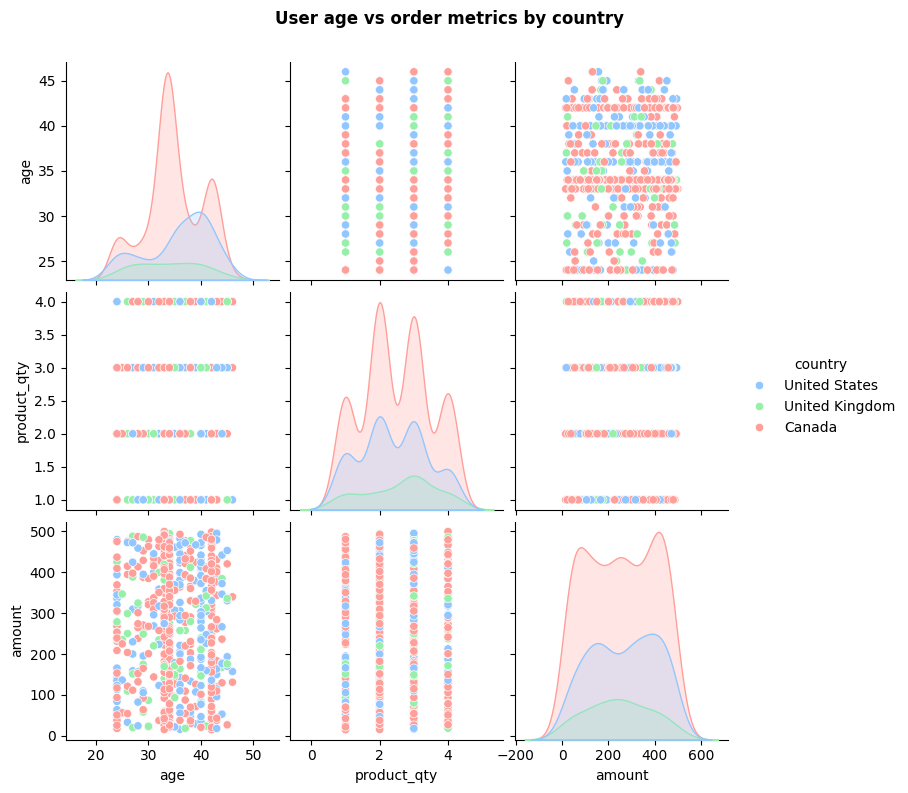

In [30]:
# Graficamos el pairplot
g = sns.pairplot(transactions_completed,
             vars=["age", "product_qty", "amount"],
             hue="country",
             diag_kind="kde")


g.figure.suptitle("User age vs order metrics by country", weight="bold", y=1.05);

Insights:


# Nivel 2

## **Ejercicio 1: Correlación de todas las variables numéricas**

In [31]:
# Visualizamos el DataFrame que hemos usado en el ejercicio anterior
transactions_completed.head()

# Filtro el DataFrame para quedarme con algunas variables que me podrían servir
transactions_completed_filtered = transactions_completed[["transaction_id","product_qty","amount","user_id", "country", "age"]]

transactions_completed_filtered.head()

,transaction_id,product_qty,amount,user_id,country,age
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3,466.92,92,United States,40
1,0466A42E-47CF-8D24-FD01-C0B689713128,3,49.53,170,United Kingdom,38
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4,92.61,275,Canada,42
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3,394.18,265,Canada,26
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2,279.93,92,United States,40


Vamos a añadir también el peso del los productos incluídos en cada transacción

In [32]:
products.head()

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,71.89,#111111,3.0,WH-1
4,5,skywalker ewok,171.22,#dbdbdb,3.2,WH-0


In [33]:
orders.head()

,transaction_id,product_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
1,122DC333-E19F-D629-DCD8-9C54CF1EBB9A,1
2,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1
3,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1
4,1EA2B262-D507-AD14-4374-4D532967113F,1


In [34]:
# Hacemos un merge de las tablas products y order por id de transacción
products_transactions_merged = pd.merge(products, orders, left_on="id", right_on="product_id")
products_transactions_merged.head()

,id,product_name,price,colour,weight,warehouse_id,transaction_id,product_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
1,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4,122DC333-E19F-D629-DCD8-9C54CF1EBB9A,1
2,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1
3,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1
4,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4,1EA2B262-D507-AD14-4374-4D532967113F,1


In [35]:
# Nos quedamos con los campos que necesitamos
transaction_weight = products_transactions_merged[["transaction_id", "weight"]]
transaction_weight.head()

,transaction_id,weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1.0
1,122DC333-E19F-D629-DCD8-9C54CF1EBB9A,1.0
2,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1.0
3,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1.0
4,1EA2B262-D507-AD14-4374-4D532967113F,1.0


In [36]:
# Agrupamos por transaction_id y sumamos, lo que nos dará el peso de los productos incluídos en cada transacción
transaction_weight_grouped = transaction_weight.groupby("transaction_id").sum().reset_index()
transaction_weight_grouped.head()

,transaction_id,weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,4.3
1,0466A42E-47CF-8D24-FD01-C0B689713128,4.3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,7.1
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,6.5
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,1.2


In [37]:
# Hacemos merge de esta tabla y de transactions_complete_filtered por transaction_id
interesting_data= pd.merge(transactions_completed_filtered,transaction_weight_grouped,on="transaction_id")
interesting_data.head()

,transaction_id,product_qty,amount,user_id,country,age,weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3,466.92,92,United States,40,4.3
1,0466A42E-47CF-8D24-FD01-C0B689713128,3,49.53,170,United Kingdom,38,4.3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4,92.61,275,Canada,42,7.1
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3,394.18,265,Canada,26,6.5
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2,279.93,92,United States,40,1.2


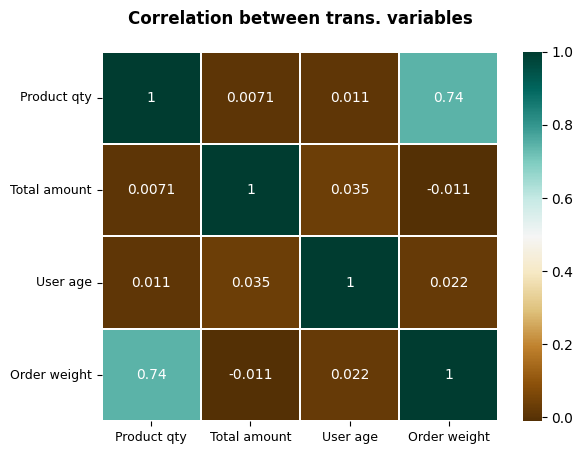

In [38]:
#Graficamos un heatmap que pueda correlacionar estas varias con .corr()

labels = ["Product qty", "Total amount", "User age", "Order weight"]

g = sns.heatmap(interesting_data[['product_qty','amount','age','weight']].corr(),
            annot=True,
            linewidths=0.1,
            cmap="BrBG")

g.set_title("Correlation between trans. variables", weight="bold", x=0.5, pad=20)
g.set_xticklabels(labels, fontsize=9)
g.set_yticklabels(labels, fontsize=9)
plt.yticks(rotation=0);

**Insights**:
- Se observa una correlación clara entre la cantidad de productos por pedido y el peso del pedido.
- Por lo que respecta al precio total de los pedidos, no parece estar relacionado con ninguna de las otras variables lo que indicaría que el rango de precios por producto es variado, existiendo grandes diferencias de precio entre productos independientemente a su tamaño.
- Por otro lado, no parece existir una relación entre la edad del usuario y la cantidad de productos que solicita o incluso con el precio de esos productos.

## **Ejercicio 2: Implementa un jointplot**

- Vamos a comparar las variables numéricas de cantidad de productos por transacción y peso total del pedido por país (variable categóricas)

In [39]:
# Recuperamos el DataFrame interesting_data del ejercicio anterior
interesting_data.head()

,transaction_id,product_qty,amount,user_id,country,age,weight
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3,466.92,92,United States,40,4.3
1,0466A42E-47CF-8D24-FD01-C0B689713128,3,49.53,170,United Kingdom,38,4.3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4,92.61,275,Canada,42,7.1
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3,394.18,265,Canada,26,6.5
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2,279.93,92,United States,40,1.2


In [40]:
interesting_data.to_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\interesting_data.csv", index=False)

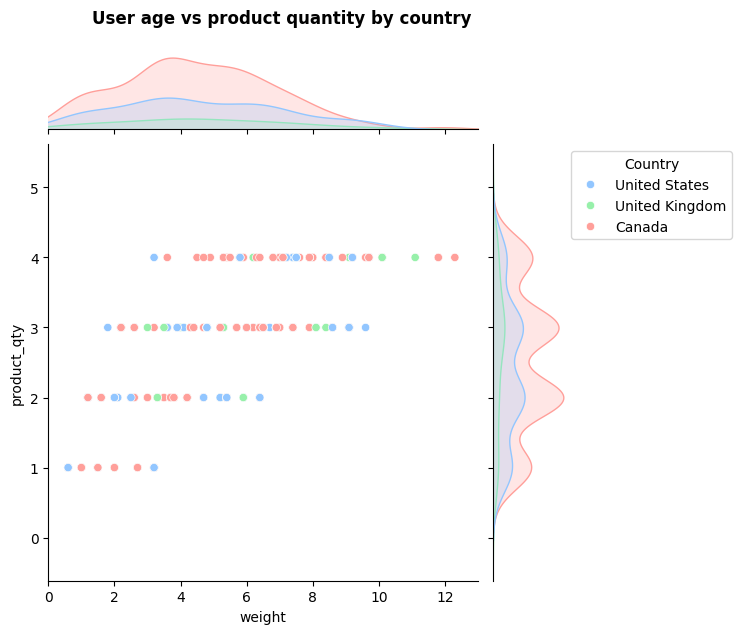

In [41]:
# Nos quedamos con las columnas "weight", "product_qty" y "country", asignado a hue como tercer variable
g = sns.jointplot(data=interesting_data,
                 x="weight",
                 y="product_qty",
                 hue="country",
                 xlim=(0,13)
                 )

g.figure.suptitle("User age vs product quantity by country", weight="bold", y=1.05)
sns.move_legend(g.ax_joint, "upper left", bbox_to_anchor=(1.2, 1), title='Country')


**Insights:**

- La correlación entre cantidad de productos por pedido y peso del pedido es positiva, ya que a mayor cantidad de productos el pedido tiende a pesar más
- Canadá es el pais que solicita una mayor cantidad de productos por pedido, y que por lo tanto tiene un número mayor de pedidos. El peso de sus pedidos está cercano a los 3kgs.

# Nivel 3

## **Ejercicio 1: Implementa un violinplot combinado con otro tipo de gráfico**

- Vamos a usar el dataframe interesting_data ya que contiene varias métricas interesantes que podemos usar.
- En este caso, utilizaremos el violinplot para mostrar la distribución de la edad de los usuarios por país.
- Superpondremos un pointplot para que nos muestre la media de edad de los usuarios por país, complementando así la información proporcionada por el violinplot.

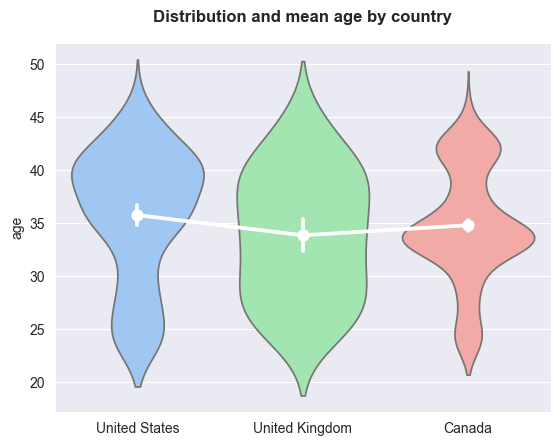

In [42]:
sns.set_style("darkgrid")
sns.color_palette("Paired")

# Violinplot
sns.violinplot(data=interesting_data, x="country", y="age", hue="country", inner=None)

# Pointplot superpuesto para que nos muestre la media de edad por país
sns.pointplot(data=interesting_data, x="country", y="age", color="white")

plt.title("Distribution and mean age by country", weight="bold", pad=15);
plt.xlabel("");

**Insights:**

- Canada es el pais con un rango menor de edad entre usuarios (menor desviación estandard), con un rango de edades comprendidas entre los 21 y los 49 años. Su distribución de edad es algo irregular, presentando mayor densidad de usuarios en una edad cercana a los 34 años, y es el país con menos usuarios por debajo de los 30. Comprende más usuarios de 34 años que el resto de países y su media de edad es de 35 años.
- United Kingdom es el país con una mayor desviación estandard entre las edades de sus usuarios (desde los 19 hasta los 51), formando un grupo de edad homogéneo desde los 28 hasta los 40 años.
- Estados Unidos muestra una base más amplia de usuarios cercana a los 40 años, lo que supone que la media de edad de sus usuarios sea la más elevada (36 años)

## **Ejercicio 3: Genera un FacetGrid para visualizar múltiples aspectos de los datos de forma simultánea**

In [43]:
# Visualizamos el DataFrame que hemos usado en el ejercicio anterior
transactions_completed.head()

# Vamos a crear una columna nueva agrupando a los usuarios por edades
group = ["18-25", "26-32", "33-42", "43-65", "> 65" ] # Creamos 5 grupos de edad
bins = [18, 25, 32, 42, 65, 100] # Definimos los límited de cada grupo de edad

transactions_completed["age_group"] = pd.cut(transactions_completed["age"], bins=bins, labels=group, right=False)
transactions_completed.head()

,transaction_id,product_qty,index,id_x,card_id,business_id,timestamp,amount,declined,product_ids,...,surname,phone,email,birth_date,country,city,postal_code,address,age,age_group
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,3,0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",...,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,33-42
1,0466A42E-47CF-8D24-FD01-C0B689713128,3,1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",...,Benjamin,0800 1111,porttitor@icloud.ca,1987-05-15,United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,38,33-42
2,063FBA79-99EC-66FB-29F7-25726D1764A5,4,2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",...,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,1982-08-03,Canada,Richmond,R8H 2K2,8564 Facilisi. St.,42,43-65
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,3,3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",...,Keith,022-178-1548,arcu.eu@protonmail.org,1999-01-10,Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",26,26-32
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,2,4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",...,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,1984-09-21,United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",40,33-42


In [44]:
# Filtramos el DataFrame para quedarnos con las columnas que necesitaremos
transactions_completed_filtered_v2 = transactions_completed[["transaction_id", "product_qty","amount", "declined", "age_group"]]

transactions_completed_filtered_v2.head()

transactions_completed_filtered_v2["status"] = transactions_completed_filtered_v2["declined"].map({0: "accepted", 1: "declined"})
transactions_completed_filtered_v2.head()

transactions_completed_filtered_v2.to_csv(r"G:\Mi unidad\Personal\04 Formación\Data Analyst\IT Academy\2. Data Analytics\Sprint_8_Pandas\bbdd\transactions_completed_filtered_v2.csv", index=False)

C:\Users\Alex\AppData\Local\Temp\ipykernel_9872\1063046979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_completed_filtered_v2["status"] = transactions_completed_filtered_v2["declined"].map({0: "accepted", 1: "declined"})


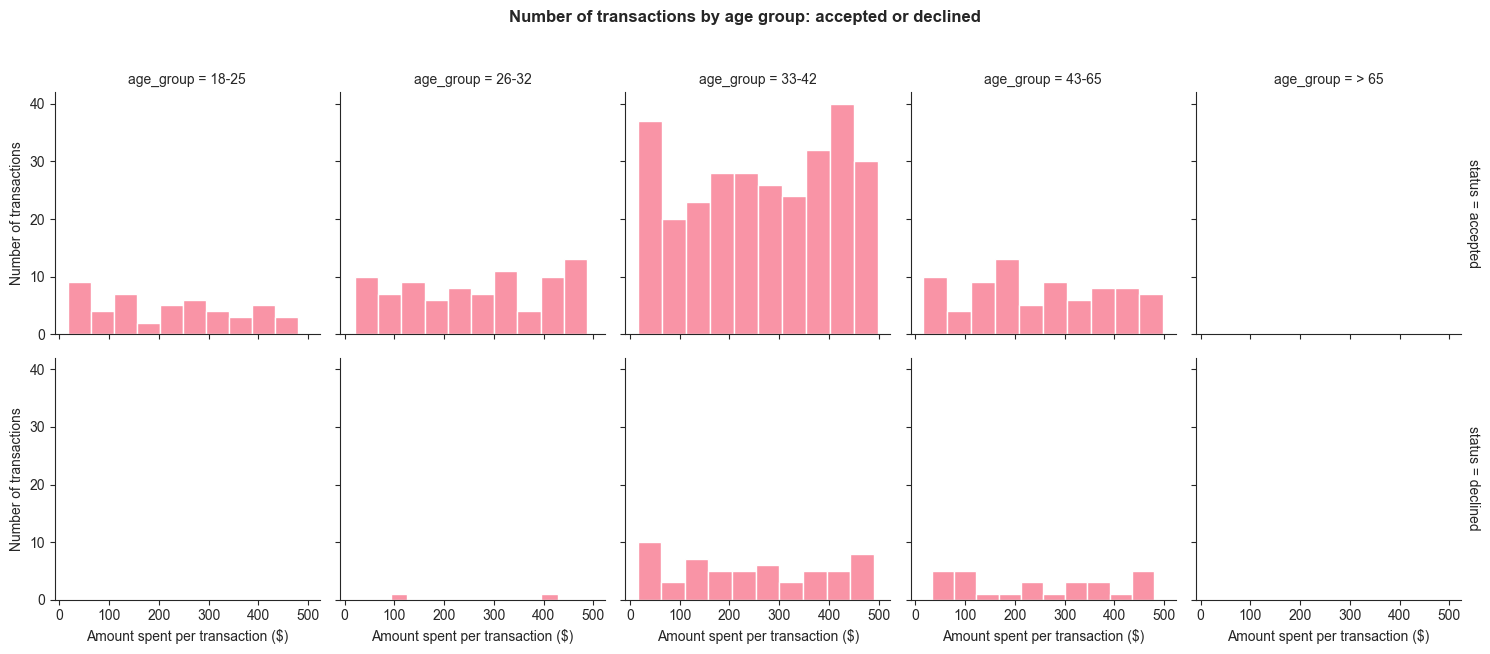

In [47]:
sns.set_style("ticks")
sns.set_palette("husl",1)

g = sns.FacetGrid(transactions_completed_filtered_v2, col="age_group", row="status", margin_titles=True)
g.map(sns.histplot, "amount", bins=10)

g.figure.suptitle("Number of transactions by age group: accepted or declined", weight="bold", y=1.08)
g.set_axis_labels("Amount spent per transaction ($)", "Number of transactions");



**Insights:**

- Observamos que las transacciones declinadas registradas se han producido en los grupos de edad comprendidos entre los 33-42 años y 43-65 años. Además, tampoco parece observarse una predominancia de transacciones declinadas de un importe específico, ya que las transacciones declinadas van desde los $20 hasta los casi $500
La hipótesis más común de pensar que las transacciones declinadas suceden entre los usuarios más jovenes debido a problemas de liquidez no sería acertada.
- No disponemos de ningún usuario en edad de jubilación.
- Nuestro grupo de usuarios más activo se encuentra en el grupo entre los 33 y los 42 años.


In [46]:
%who

age_avg_spending	 ax	 bins	 cambio_valor	 colores	 colors	 companies	 companies_count	 connection	 
container	 country_trans_filtered	 country_trans_grouped	 credit_card_status	 credit_cards	 fig	 g	 group	 height	 
interesting_data	 labels	 max_val	 mysql	 np	 orders	 patch	 pd	 plt	 
prod_per_transaction	 products	 products_transactions_merged	 sns	 tables	 today	 trans_comp_grouped	 trans_comp_merged	 trans_comp_sorted	 
trans_users_merged	 transaction_weight	 transaction_weight_grouped	 transactions	 transactions_completed	 transactions_completed_filtered	 transactions_completed_filtered_v2	 users	 users_transactions_merged	 

